In [1]:
## import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve,precision_score,recall_score,precision_recall_curve,f1_score,accuracy_score
import warnings 
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset
data = pd.read_csv('Leads.csv')

In [3]:
## reading the first 5 rows of dataset to understand the data
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
## checking the dataset
data.shape

(9240, 37)

In [5]:
## fetching the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
## to get the idea of numeric columns, describe keyword is used  
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
## In various columns we can see columns with "SELECT" values,we will be converting "select"(it means no value is being selected) to NAN.
data = data.replace('Select',np.nan)
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [8]:
## checking the null values 
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
## We can see alot of null values in many columns, let's check the percentage of null columns

round(100*(data.isnull().sum()/len(data.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
cols = data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index)))>=45):
        data.drop(i,1,inplace = True)

In [11]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
data.shape

(9240, 30)

## Categorical Analysis

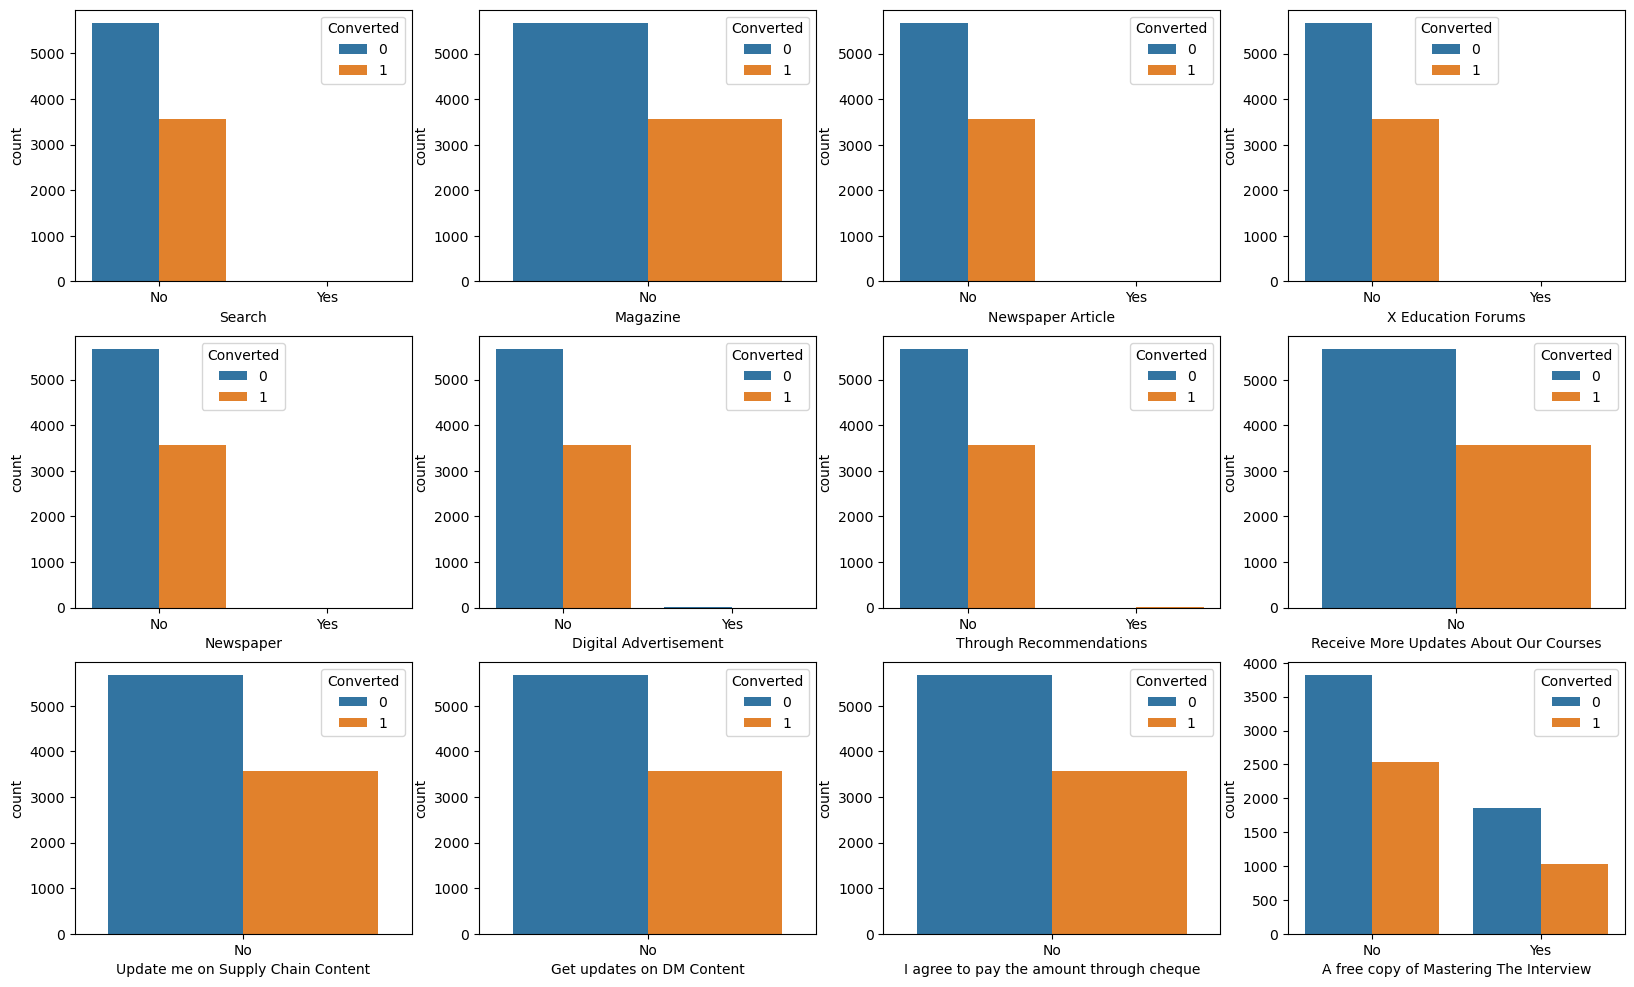

In [13]:
## Let's Check the imbalanced data/variables through visualization

fig,axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x= "Search",hue = "Converted", data = data,ax = axs[0,0])
sns.countplot(x= "Magazine",hue = "Converted", data = data,ax = axs[0,1])
sns.countplot(x= "Newspaper Article",hue = "Converted", data = data,ax = axs[0,2])
sns.countplot(x= "X Education Forums",hue = "Converted", data = data,ax = axs[0,3])
sns.countplot(x= "Newspaper",hue = "Converted", data = data,ax = axs[1,0])
sns.countplot(x= "Digital Advertisement",hue = "Converted", data = data,ax = axs[1,1])
sns.countplot(x= "Through Recommendations",hue = "Converted", data = data,ax = axs[1,2])
sns.countplot(x= "Receive More Updates About Our Courses",hue = "Converted", data = data,ax = axs[1,3])
sns.countplot(x= "Update me on Supply Chain Content",hue = "Converted", data = data,ax = axs[2,0])
sns.countplot(x= "Get updates on DM Content",hue = "Converted", data = data,ax = axs[2,1])
sns.countplot(x= "I agree to pay the amount through cheque",hue = "Converted", data = data,ax = axs[2,2])
sns.countplot(x= "A free copy of Mastering The Interview",hue = "Converted", data = data,ax = axs[2,3])
plt.show()

 ## Inference
   We can see that for all these columns, data is highly Imbalanced, thus we will drop them. 

In [14]:
#let's create the list of imbalanced columns to drop them

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

## Country

In [15]:
data['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

## Inference:
We can see that the missing values are very high, so we will be imputing all missing values

In [16]:
data['Country'] = data['Country'].replace(np.nan,'not provided')
##data_desc= data.sort_values('Country',ascending=False)

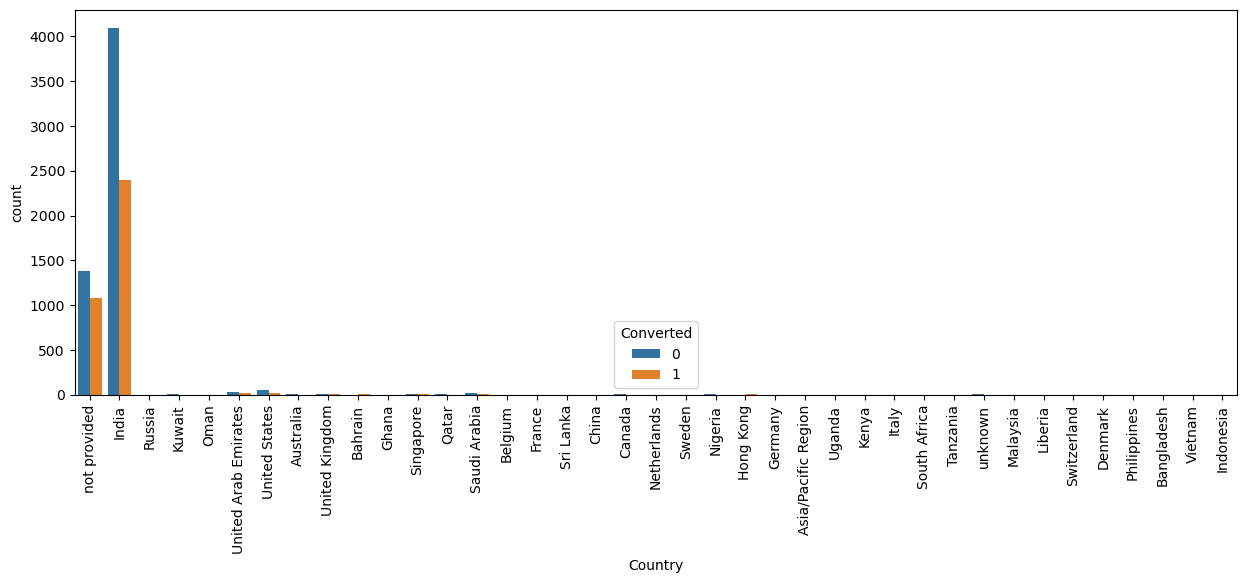

In [17]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =data) ##data_desc
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


## Inference
 No inference can be made from the country plot, as most of the data consists of single value which in India.
 
 So we will be dropping this column.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## What is your current occupation

In [19]:
data['What is your current occupation'].value_counts(dropna = False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

## Inference 
We can see alot of missing values in this column and this column consists of data realted to occupation, hence we will be imputing nan values

In [20]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan,'not provided')


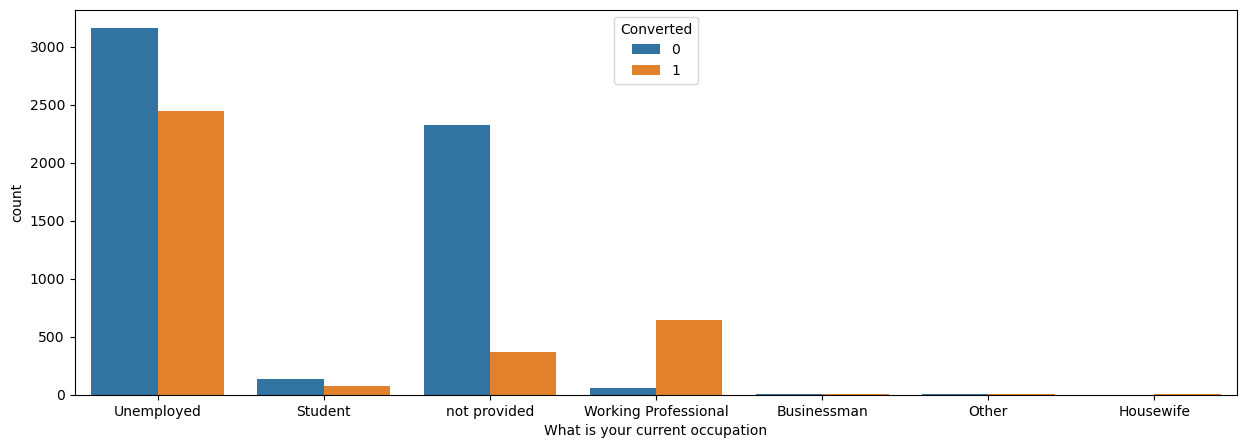

In [21]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What is your current occupation', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

## Inference 
Maximum leads are generated are unemployed and their conversion rate is more than 50%

## What matters most to you in choosing a course

In [22]:
data['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'not provided')

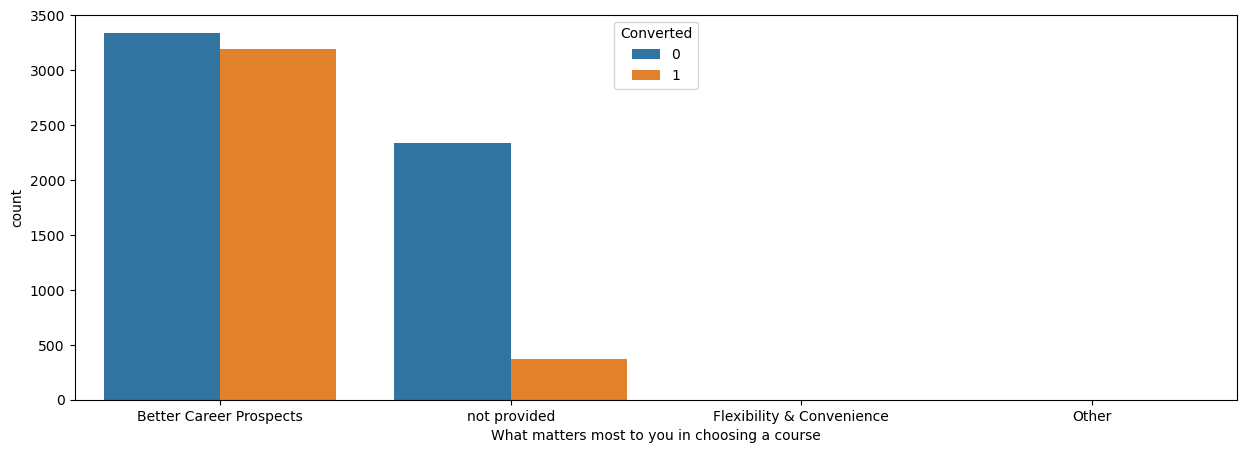

In [24]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

## Inference.
No findings are being concluded from the above graph , hence we can drop this column

## LAST ACTIVITY

In [25]:
data['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Email Opened')

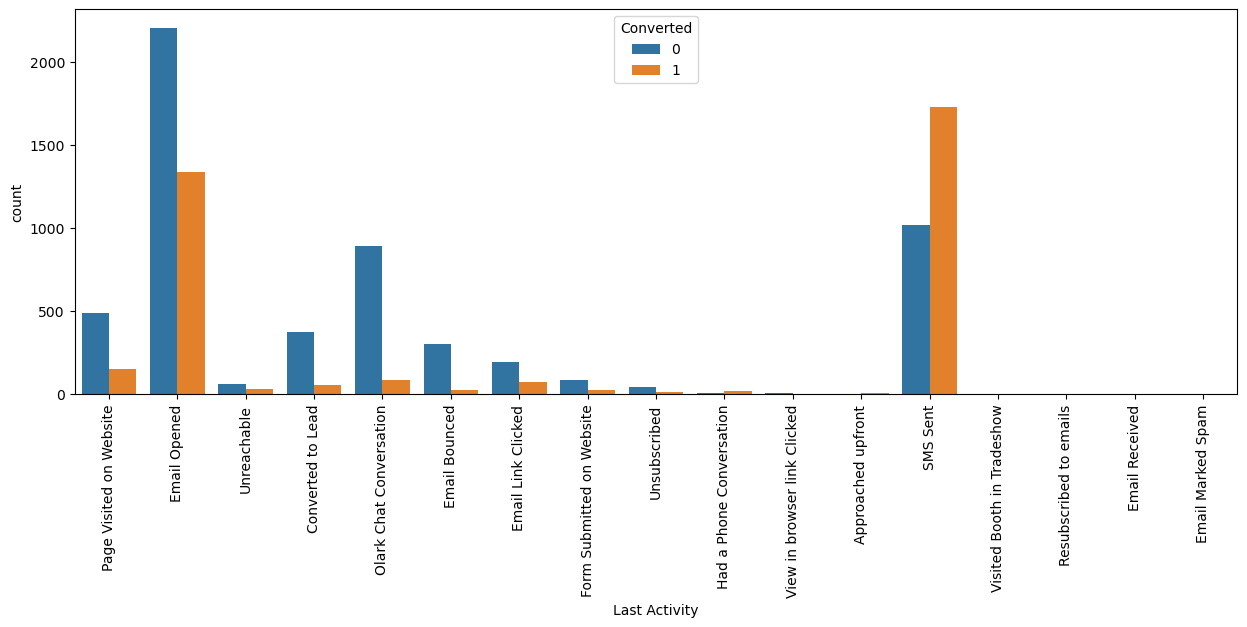

In [27]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Last Activity', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

## Inference
From the above plot we can say that the maximum last activity generated is  Email opened. 

No other and important inference is being generated from the above plot, hence we will drop it.

## Lead Source

In [28]:
data['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [29]:
## We can impute the nan values with google
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Google')

## this column consist of same lable name but with different spelling so we will convert 'google' to Google

data['Lead Source'] = data['Lead Source'].replace('google','Google')

In [30]:
## Let's merge the values with less frequency to OTHERS
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')


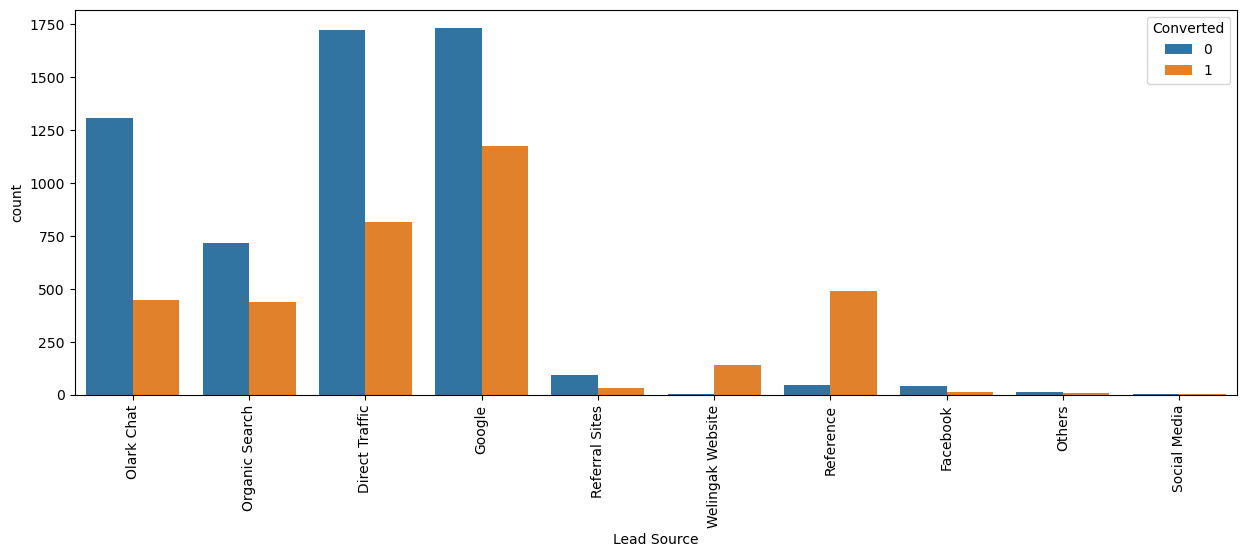

In [31]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

## Inference 
Maximum leads are generated by Google and Direct Traffic.

Conversation rate of reference leads and Welinkgak Website leads is very high

## Lead Origin

In [32]:
## There is no null values in this column , hence no imputation is required
data['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

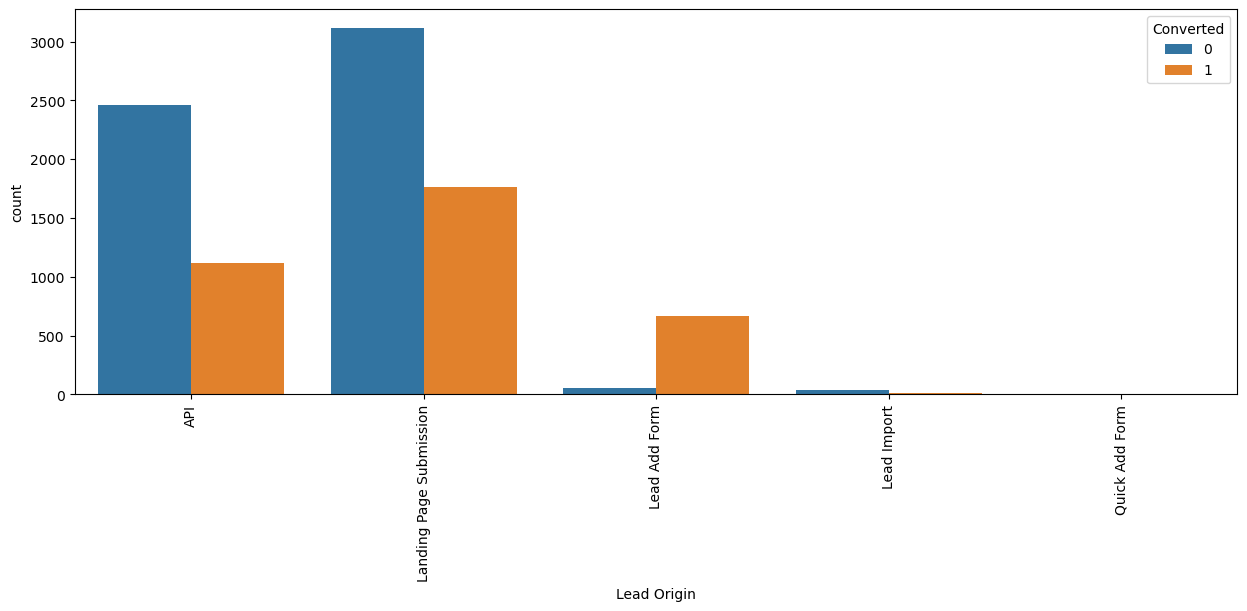

In [33]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Origin', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

## Inference 
From the above plot we can see that the 'Landing Page submission' is being generated more than the others.

## Do Not Email

In [34]:
data['Do Not Email'].value_counts()
## There are no null values in this column , hence no imputation required 

No     8506
Yes     734
Name: Do Not Email, dtype: int64

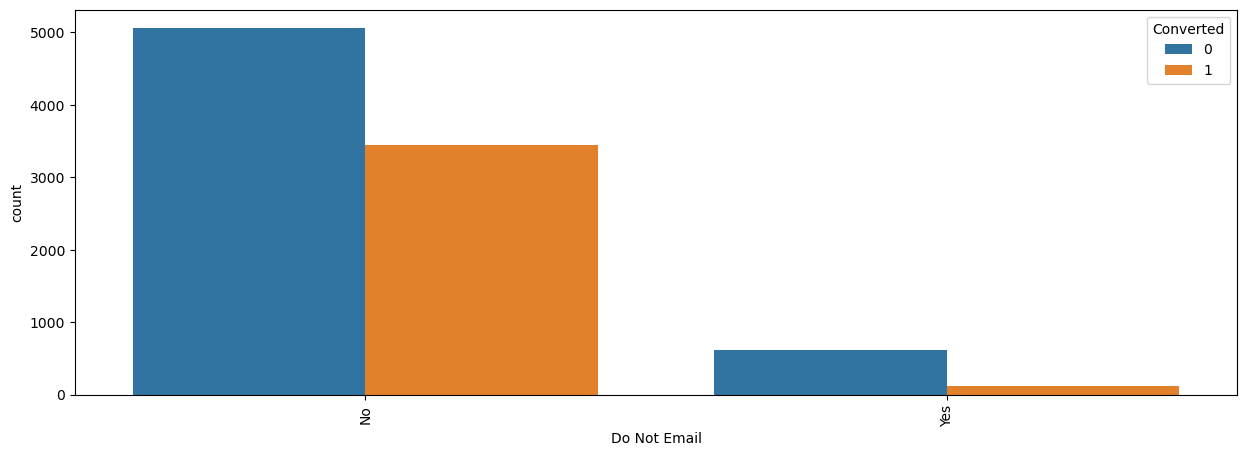

In [35]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Do Not Email', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

## Do Not Call

In [36]:
data['Do Not Call'].value_counts()
## There are no null values in this column , hence no imputation required 

No     9238
Yes       2
Name: Do Not Call, dtype: int64

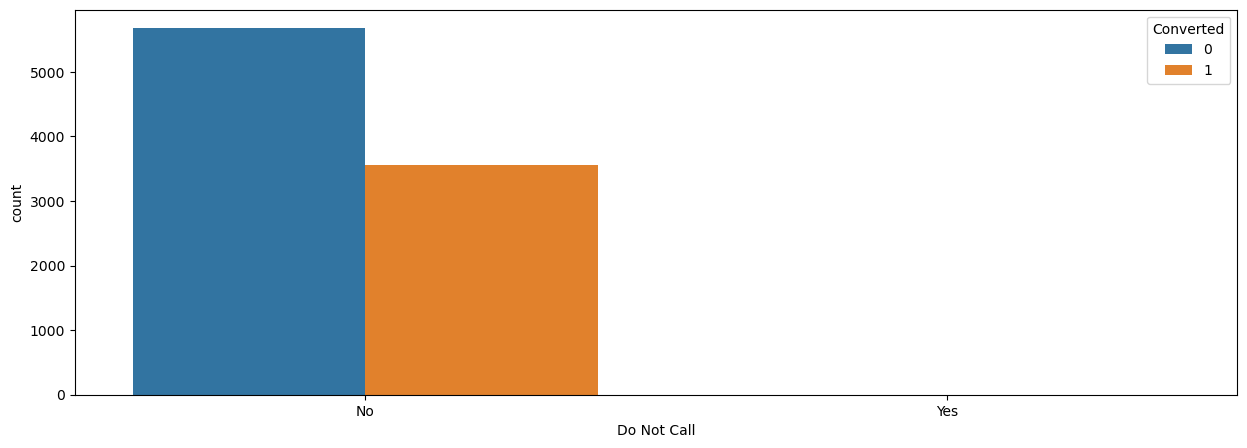

In [37]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Do Not Call', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

## Inference 
From above plot we can say that this column is highly skewed , hence we will be dropping this column

# Last Notable Activity

In [38]:
data['Last Notable Activity'].value_counts()
## There are no null values in this column , hence no imputation required 

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

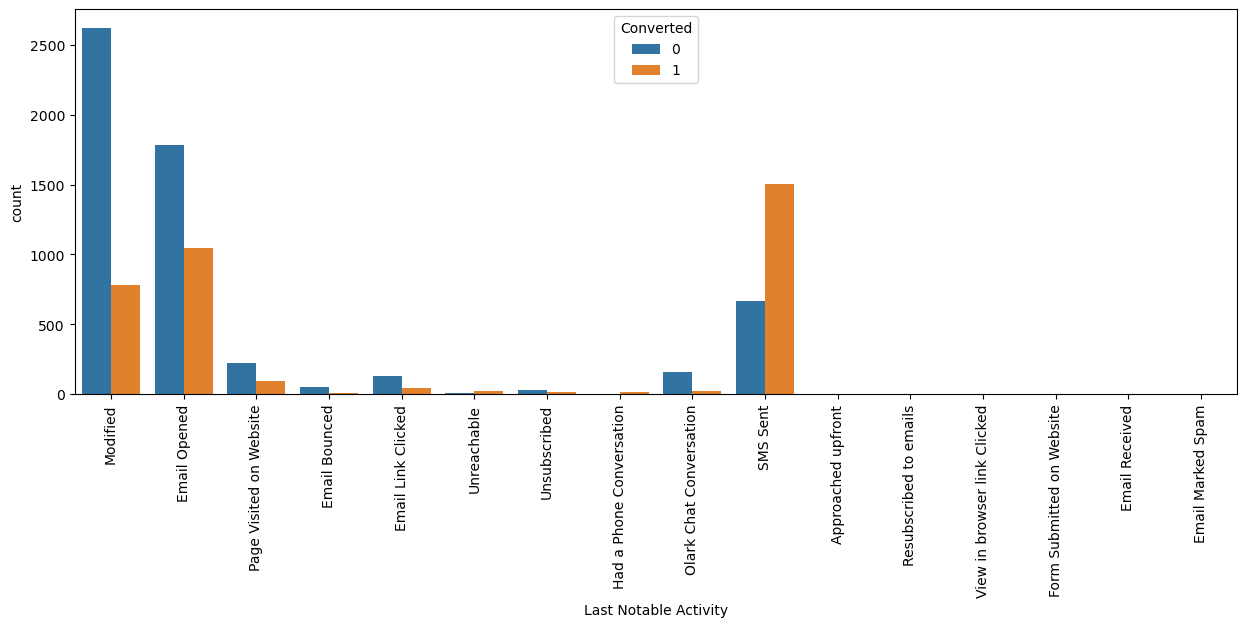

In [39]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Last Notable Activity', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

## Inference 
No important outcome is detected from this column , hence we will drop  it.

In [40]:
## Let's delete the column which we decided to drop.
## We will append these column with the variable we created for dropping the unwanted columns.
cols_to_drop.append('Country')
cols_to_drop.append('Last Activity')
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop.append('Last Notable Activity')
cols_to_drop.append('Do Not Call')

In [41]:
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'Last Activity',
 'What matters most to you in choosing a course',
 'Last Notable Activity',
 'Do Not Call']

In [42]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [43]:
## dropping the list of columns we created
data = data.drop(cols_to_drop,1)


In [44]:
data['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [45]:
data['Specialization'] = data['Specialization'].replace(np.nan,'Not Provided')

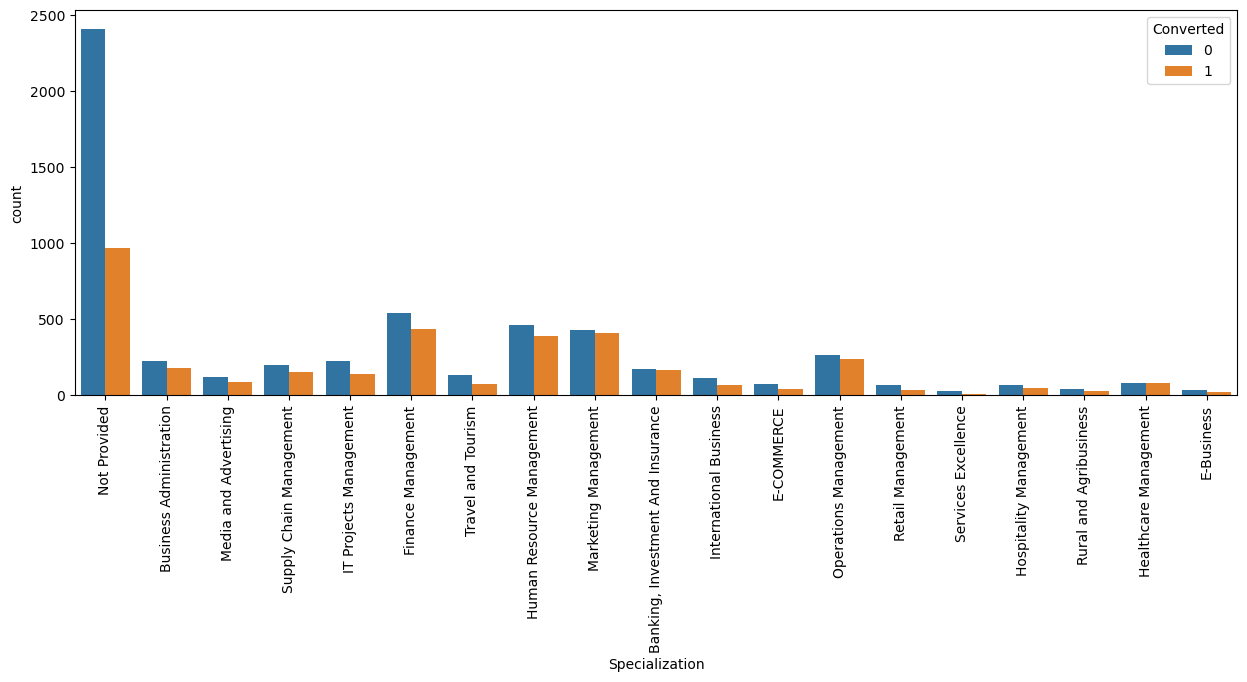

In [46]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Specialization', hue='Converted' , data =data) 
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

#### From the above plot we don't get any relevant information , hence we will dropping this.

In [47]:
data['City'].value_counts(dropna = False)
data['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [48]:
data['City'] = data['City'].replace(np.nan,'Not Provided')
data['Tags'] = data['Tags'].replace(np.nan,'Not Provided')

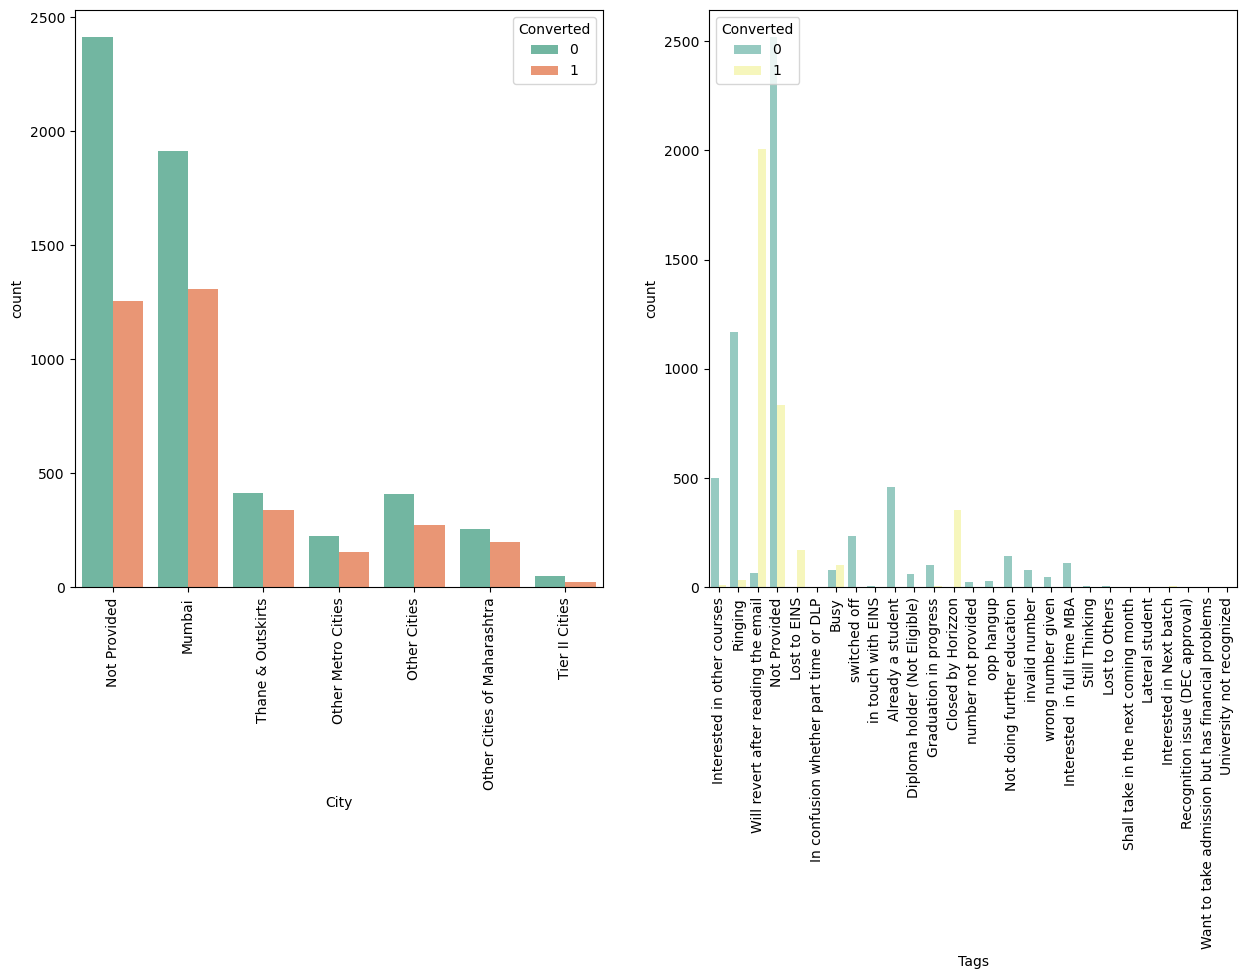

In [49]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
ax1 = sns.countplot(x = "City", hue = "Converted", data = data, ax = axs[0],palette = 'Set2')
ax2 = sns.countplot(x = "Tags", hue = "Converted", data = data, ax = axs[1],palette = 'Set3')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()


#### Inference :
###### the above 2 columns contains of maximum number of nan values, hence we will be dropping these 2 columns

In [50]:
## create list to drop the 3 colmns with high number of nan values
new_cols_to_drop = ['Specialization','City','Tags']

In [51]:
## Let's drop 3 more columns using the above varibale.
data = data.drop(new_cols_to_drop,1)

In [52]:
data.shape

(9240, 10)

## Numerical Attributes Analysis

In [53]:
numerical_col = data.select_dtypes(include='number').columns
len(numerical_col)

5

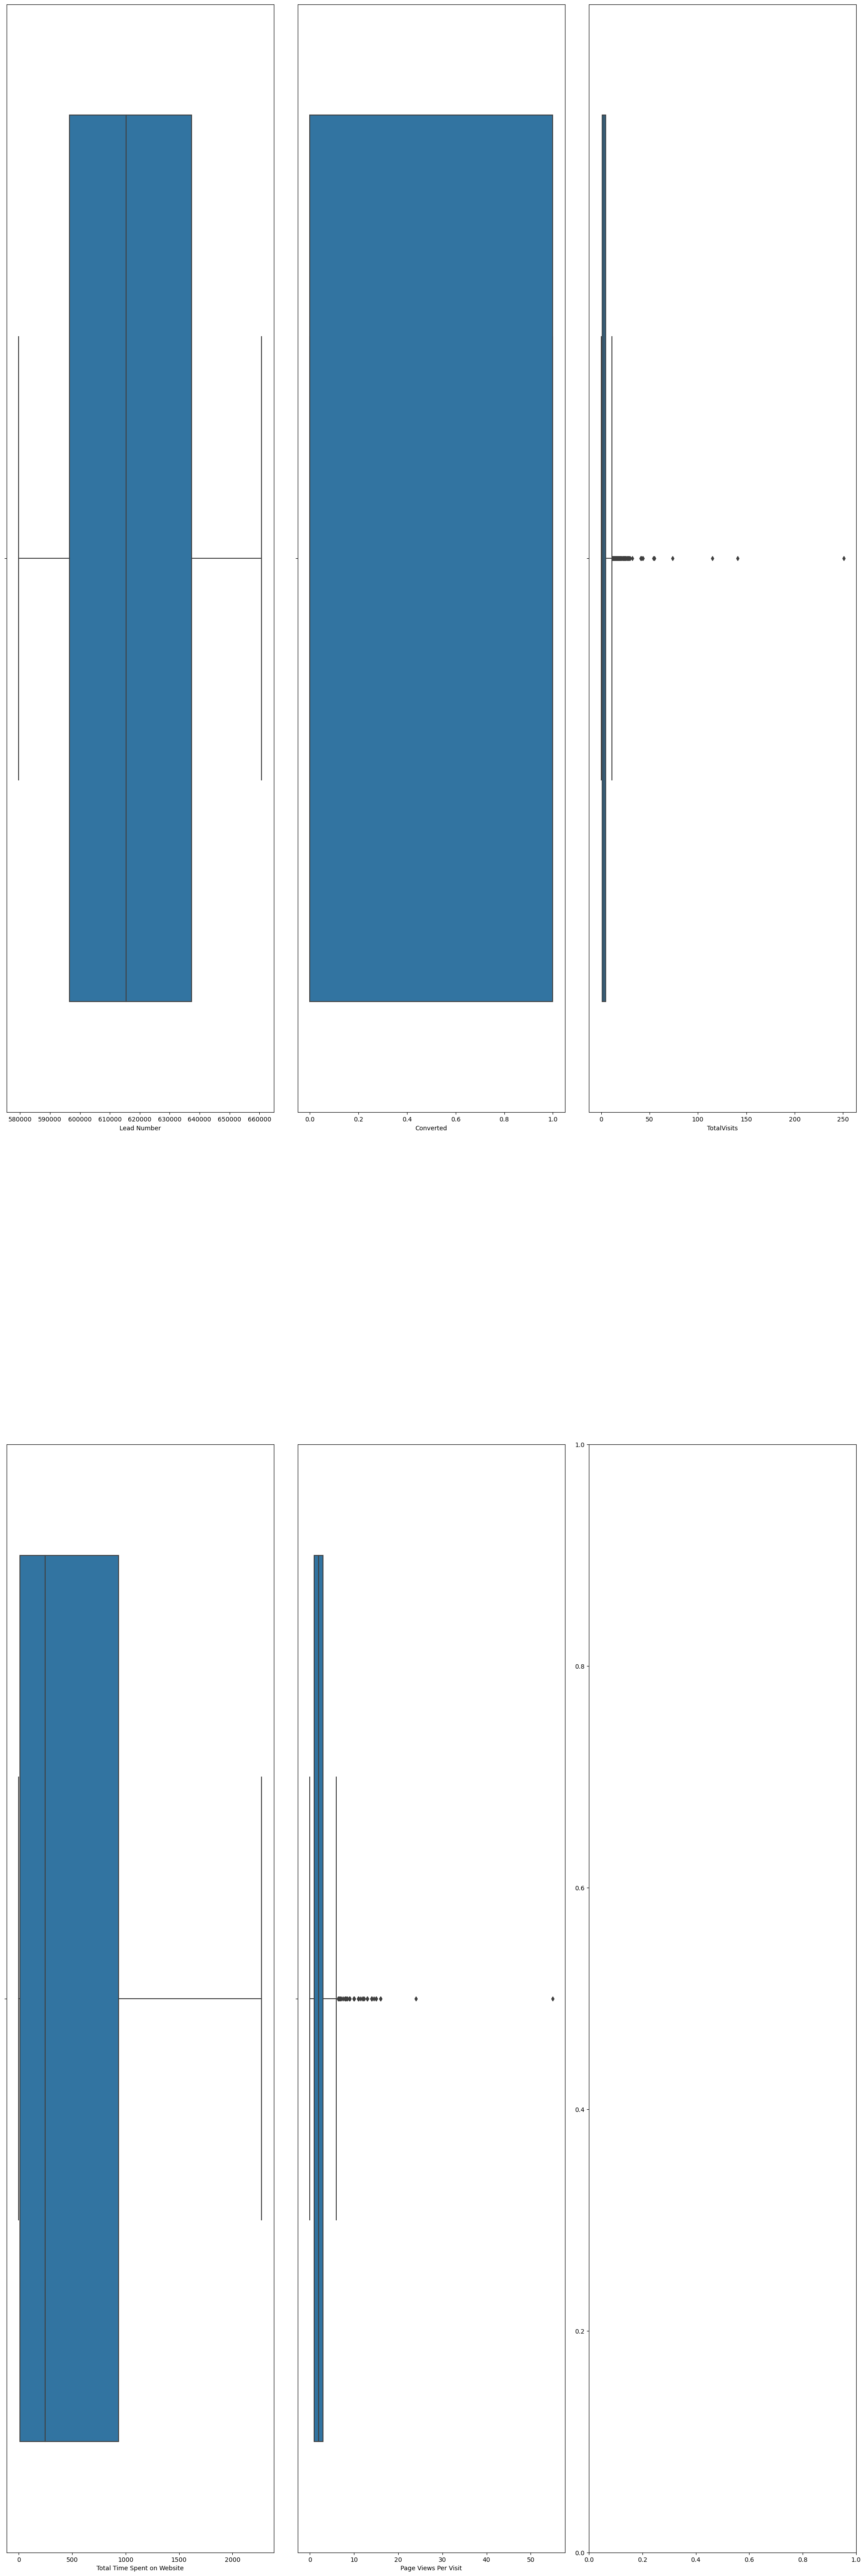

In [54]:
fig, axes = plt.subplots(nrows=2,ncols=3,constrained_layout = True)
fig.subplots_adjust(left =0,bottom=0,right=3,top=12,wspace=0.09,hspace =0.3)

for ax,column in zip(axes.flatten(),numerical_col):
    sns.boxplot(data[column],ax=ax)

### From the above box plots we can say that the following columns have outliers:

#### Total Visits

#### Page views Per Visit

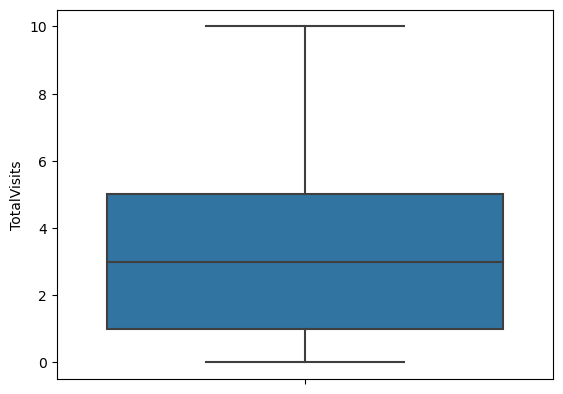

In [55]:
## Let's handle the outliers for above mentioned columns by rounding off the outliers to 95% value for analysis

percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=data['TotalVisits'])
plt.show()



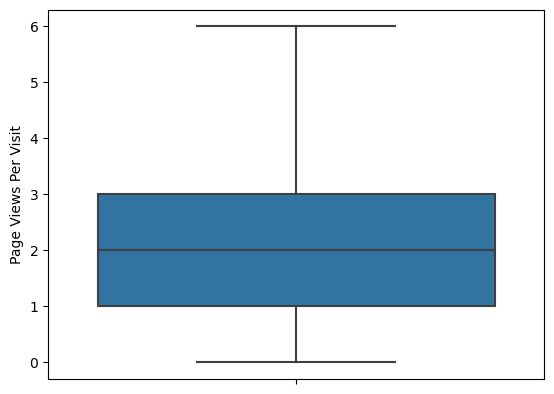

In [56]:
## Let's handle the outliers for above mentioned columns by rounding off the outliers to 95% value for analysis

percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()


### From the above 2 boxplots we can see that no outliers are left in our data, hence we are good to go ahead.

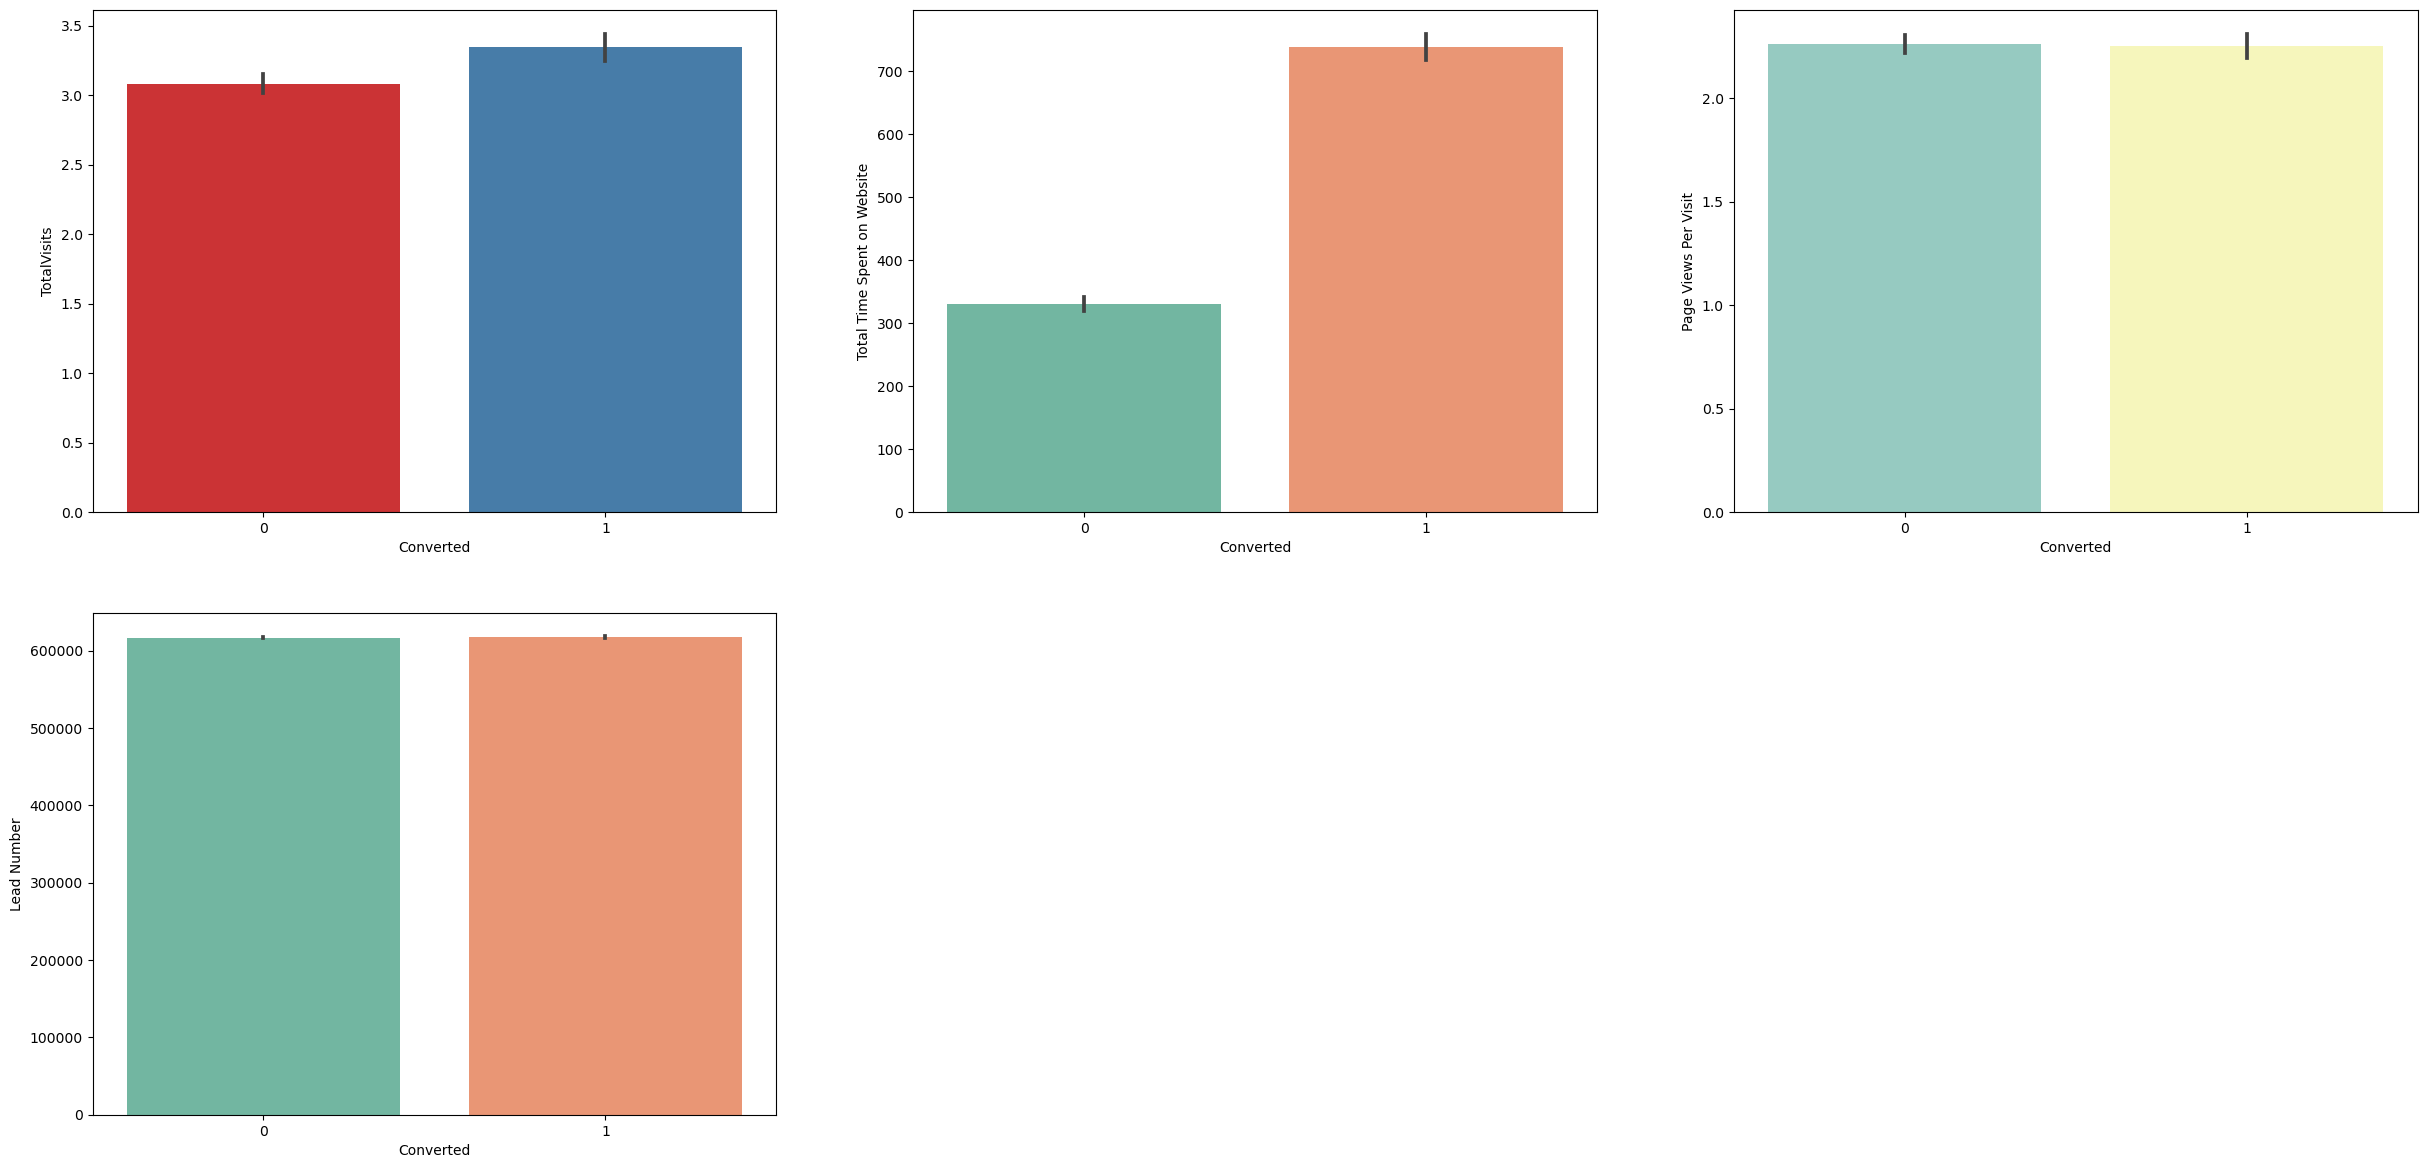

In [57]:
## Let's check the conversion with the numerical columns

plt.figure(figsize=(30,30))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set3', data = data)
plt.subplot(4,3,4)
sns.barplot(y = 'Lead Number', x='Converted', palette='Set2', data = data)
plt.show()

## Inference :

The conversion rate for TotalVisits,Total Time Spent on Website and Page Views Per Visit are high whereas ,

No conclusion can be drwan from the lead number as the rate is same hence we will drop this column.

In [58]:
data = data.drop('Lead Number',1)

In [59]:
data = data.drop('Prospect ID',1)

In [60]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                        0.00
Lead Source                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        1.48
Total Time Spent on Website        0.00
Page Views Per Visit               1.48
What is your current occupation    0.00
dtype: float64

In [61]:
## Since the missing values percentage is less than 2% so we can drop these rows

data = data.dropna()


#### Now we are all set for data prepration as all lables are in good shape.
Lets again check the percenatge of null values and information of data

In [62]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
What is your current occupation    0.0
dtype: float64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


## Data Prepration

In [64]:
# We can see a column named "Do Not Email" consists of binary values i.e. Yes or No, hence we will be converting it to 0/1

data['Do Not Email']=data['Do Not Email'].map({'Yes':1,'No':0})

In [65]:
data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.00,Unemployed
1,API,Organic Search,0,0,5.0,674,2.50,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Unemployed
...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Unemployed
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,Unemployed
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,Unemployed
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,not provided


In [66]:
## Let's create the "DUMMY VARIABLES"

categorical_variable = data.select_dtypes(include= ['object']).columns
categorical_variable

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [67]:
## let's get thee dummies variable for 3 categorical variables and dropping the original coolumns afer geeting the dummy one

dummy = pd.get_dummies(data[['Lead Origin']],drop_first = True)
data = pd.concat([data,dummy],axis=1)

dummy = pd.get_dummies(data[['Lead Source']],prefix ='Lead Source')
dummy = dummy.drop(['Lead Source_Others'],axis=1)
data = pd.concat([data,dummy],1)

dummy = pd.get_dummies(data[['What is your current occupation']],prefix = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_not provided'],1)
data = pd.concat([data,dummy],axis=1)



In [68]:
data.drop(categorical_variable,1,inplace = True)

In [69]:
data

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9236,0,0,2.0,238,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9237,1,0,2.0,199,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9238,0,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting of data

In [70]:
## Train / Test Split

x= data.drop('Converted', axis=1)
x


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9237,1,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9238,0,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y= data['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9103, dtype: int64

In [72]:
## splitting the data into train and test data

x_train,x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7, test_size=0.3,random_state=100)

##  FEATURE SCALING

In [73]:
from sklearn.preprocessing import StandardScaler


In [74]:
scaler = StandardScaler()
numeric_cols = x_train.select_dtypes(include=['float64','int']).columns
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

In [75]:
x_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,-0.294015,0.647106,0.601932,1.526169,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
82,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8173,3.401183,0.289424,1.445161,-0.144859,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7055,-0.294015,-0.068258,-0.754568,0.412150,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


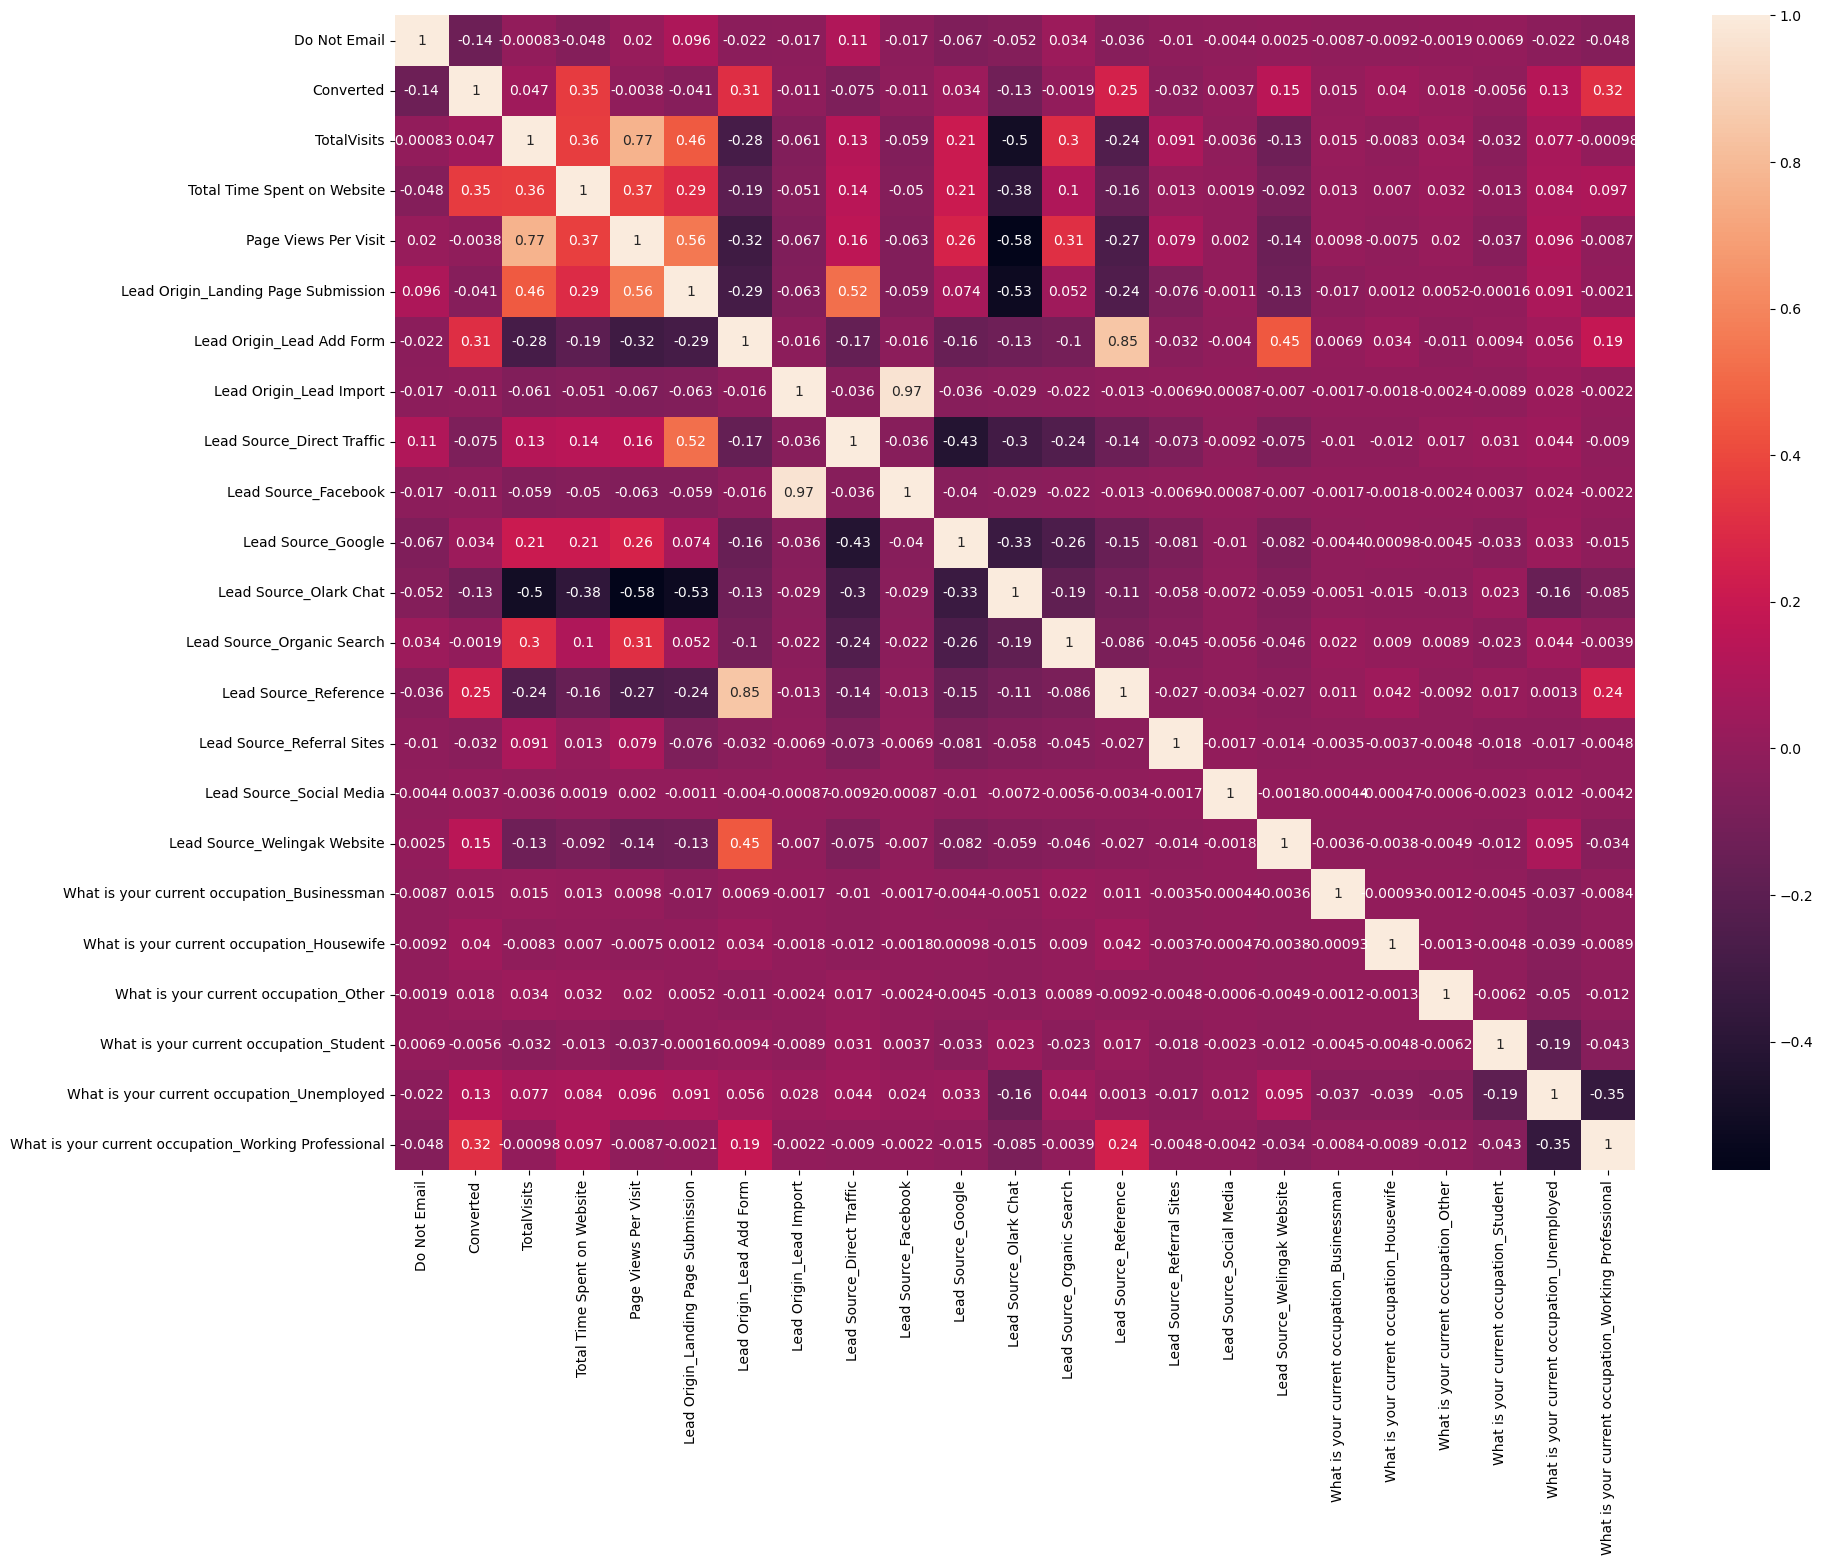

In [76]:
## let's plot the correlation plot 

plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)
plt.show()

#### Dropping column which are highly correlated from x_train and x_test

In [77]:
x_train = x_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
x_test = x_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

## MODEL BUILDING

In [78]:
import statsmodels.api as sm

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=17, step=1)
selector = selector.fit(x_train, y_train)
selector.support_

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [79]:
list(zip(x_train.columns, selector.support_, selector.ranking_))


[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [80]:
rfe_col = x_train.columns[selector.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [81]:
x_train.columns[~selector.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Social Media'],
      dtype='object')

## MODEL 1

In [82]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train[rfe_col])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.1
Date:                Sun, 18 Dec 2022   Deviance:                       5690.2
Time:                        13:44:58   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3526
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1190      0.111    -10.059      0.000      -1.337      -0.901
Do Not Email                                            -0.3534      0.043     -8.152      0.000      -0.438      -0.268
TotalVisits                                              0.2949      0.050      5.880      0.000       0.197       0.393
Total Time Spent on Website                              1.0890      0.039     28.178      0.000       1.013       1.165
Page Views Per Visit                                    -0.1376      0.056     -2.447      0.014      -0.248      -0.027
Lead Origin_Lead Add Form                                4.3339      0.779      5.565      0.000       2.808       5.860
Lead Source_Direct Traffic                              -1.2211      0.128     -9.529      0.000      -1.472      -0.970
Lead Source_Google                                      -0.9573      0.127     -7.530      0.000      -1.207      -0.708
Lead Source_Organic Search                              -1.1276      0.156     -7.220      0.000      -1.434      -0.822
Lead Source_Reference                                   -1.4808      0.810     -1.827      0.068      -3.069       0.108
Lead Source_Referral Sites                              -1.6384      0.350     -4.686      0.000      -2.324      -0.953
Lead Source_Welingak Website                             0.5693      1.058      0.538      0.591      -1.505       2.644
What is your current occupation_Businessman              1.3456      0.993      1.355      0.175      -0.601       3.292
What is your current occupation_Housewife               23.9654   1.59e+04      0.002      0.999   -3.12e+04    3.13e+04
What is your current occupation_Other                    1.2405      0.639      1.942      0.052      -0.012       2.493
What is your current occupation_Student                  1.1921      0.227      5.257      0.000       0.748       1.637
What is your current occupation_Unemployed               1.3176      0.084     15.707      0.000       1.153       1.482
What is your current occupation_Working Professional     3.8386      0.190     20.197      0.000       3.466       4.211
========================================================================================================================
"""

In [83]:
## AS we can see that the p-value of What is your current occupation_Housewife is high, so we will drop it.
rfe_col = rfe_col.drop('What is your current occupation_Housewife',1)

## MODEL 2

In [84]:
x_train_sm = sm.add_constant(x_train[rfe_col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2855.0
Date:                Sun, 18 Dec 2022   Deviance:                       5710.0
Time:                        13:44:58   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3506
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1060      0.111     -9.983      0.000      -1.323      -0.889
Do Not Email                                            -0.3548      0.043     -8.190      0.000      -0.440      -0.270
TotalVisits                                              0.2918      0.050      5.827      0.000       0.194       0.390
Total Time Spent on Website                              1.0888      0.039     28.226      0.000       1.013       1.164
Page Views Per Visit                                    -0.1391      0.056     -2.477      0.013      -0.249      -0.029
Lead Origin_Lead Add Form                                4.3295      0.779      5.560      0.000       2.803       5.856
Lead Source_Direct Traffic                              -1.2075      0.128     -9.442      0.000      -1.458      -0.957
Lead Source_Google                                      -0.9413      0.127     -7.420      0.000      -1.190      -0.693
Lead Source_Organic Search                              -1.1036      0.156     -7.087      0.000      -1.409      -0.798
Lead Source_Reference                                   -1.4531      0.810     -1.793      0.073      -3.041       0.135
Lead Source_Referral Sites                              -1.6277      0.349     -4.661      0.000      -2.312      -0.943
Lead Source_Welingak Website                             0.5829      1.058      0.551      0.582      -1.492       2.657
What is your current occupation_Businessman              1.3197      0.994      1.328      0.184      -0.628       3.267
What is your current occupation_Other                    1.2160      0.639      1.904      0.057      -0.036       2.468
What is your current occupation_Student                  1.1667      0.227      5.148      0.000       0.723       1.611
What is your current occupation_Unemployed               1.2912      0.083     15.518      0.000       1.128       1.454
What is your current occupation_Working Professional     3.8117      0.190     20.090      0.000       3.440       4.184
========================================================================================================================
"""

In [85]:
rfe_col = rfe_col.drop('Lead Source_Welingak Website',1)

## MODEL 3

In [86]:
x_train_sm = sm.add_constant(x_train[rfe_col])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2855.1
Date:                Sun, 18 Dec 2022   Deviance:                       5710.3
Time:                        13:44:58   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3505
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1014      0.110     -9.968      0.000      -1.318      -0.885
Do Not Email                                            -0.3556      0.043     -8.206      0.000      -0.441      -0.271
TotalVisits                                              0.2923      0.050      5.836      0.000       0.194       0.390
Total Time Spent on Website                              1.0897      0.039     28.257      0.000       1.014       1.165
Page Views Per Visit                                    -0.1378      0.056     -2.456      0.014      -0.248      -0.028
Lead Origin_Lead Add Form                                4.6756      0.525      8.902      0.000       3.646       5.705
Lead Source_Direct Traffic                              -1.2133      0.128     -9.516      0.000      -1.463      -0.963
Lead Source_Google                                      -0.9489      0.126     -7.518      0.000      -1.196      -0.702
Lead Source_Organic Search                              -1.1103      0.155     -7.149      0.000      -1.415      -0.806
Lead Source_Reference                                   -1.8015      0.566     -3.183      0.001      -2.911      -0.692
Lead Source_Referral Sites                              -1.6345      0.349     -4.682      0.000      -2.319      -0.950
What is your current occupation_Businessman              1.3194      0.994      1.328      0.184      -0.629       3.267
What is your current occupation_Other                    1.2160      0.639      1.904      0.057      -0.036       2.468
What is your current occupation_Student                  1.1659      0.227      5.143      0.000       0.722       1.610
What is your current occupation_Unemployed               1.2917      0.083     15.524      0.000       1.129       1.455
What is your current occupation_Working Professional     3.8125      0.190     20.092      0.000       3.441       4.184
========================================================================================================================
"""

#### Since the Model 3 seems to be stable with significant p-values, we shall go ahead with this model for further analysis



## Calculating VIF

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(x_train[rfe_col].values, i) for i in range(x_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,Lead Origin_Lead Add Form,3.86
8,Lead Source_Reference,3.64
12,What is your current occupation_Unemployed,2.75
3,Page Views Per Visit,2.70
1,TotalVisits,2.51
6,Lead Source_Google,1.89
5,Lead Source_Direct Traffic,1.79
7,Lead Source_Organic Search,1.54
13,What is your current occupation_Working Profes...,1.32
2,Total Time Spent on Website,1.22


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only



## Let's predict the Train Model

In [90]:
y_train_pred = res.predict(x_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72939205, 0.16165659, 0.24867125, 0.98208885, 0.30439537,
       0.10798196, 0.27905986, 0.28536432, 0.10798196, 0.61174444])

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,0,0.729392,7962
1,0,0.161657,5520
2,0,0.248671,1962
3,1,0.982089,1566
4,0,0.304395,9170


In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted
0,0,0.729392,7962,1
1,0,0.161657,5520,0
2,0,0.248671,1962,0
3,1,0.982089,1566,1
4,0,0.304395,9170,0


## CONFUSION METRICS

In [93]:
from sklearn import metrics

matrix = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(matrix)

[[3534  419]
 [ 859 1560]]


In [94]:
## accuracy score
print(f'ACCURACY of our model is {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted).round(3)}')


ACCURACY of our model is 0.799


In [95]:
## let's calculate the senstivity and specificity of our model
TP = matrix[1,1] # true positive 
TN = matrix[0,0] # true negatives
FP = matrix[0,1] # false positives
FN = matrix[1,0] # false negatives

In [96]:
## SENSTIVITY
print(f'Senstivity of our model is {TP / float(TP+FN)}')


## SPECIFICICTY
print(f'Specificity of our model is {TN / float(TN+FP)}')



Senstivity of our model is 0.6448945845390658
Specificity of our model is 0.8940045535036681


## Let's plot the "ROC CURVE"

##### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )


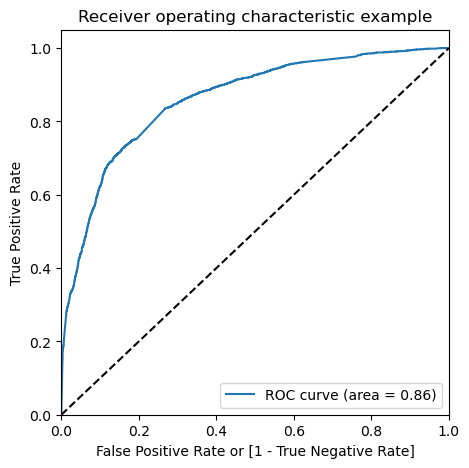

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)


#### The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.



In [100]:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.729392,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.161657,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.248671,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.982089,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.304395,9170,0,1,1,1,1,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.379630     1.000000     0.000000
0.1   0.1  0.513967     0.980570     0.228434
0.2   0.2  0.693974     0.906160     0.564129
0.3   0.3  0.770873     0.836296     0.730837
0.4   0.4  0.802103     0.705250     0.861371
0.5   0.5  0.799435     0.644895     0.894005
0.6   0.6  0.782957     0.568417     0.914242
0.7   0.7  0.763653     0.473749     0.941057
0.8   0.8  0.734777     0.354279     0.967620
0.9   0.9  0.691777     0.198016     0.993929


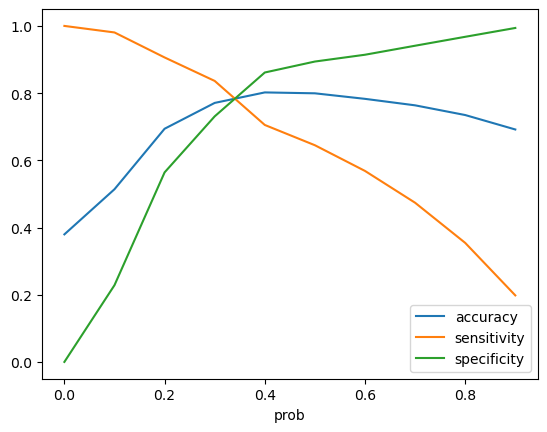

In [102]:

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()


#### From the above roc curve , we can see that the cut off proability is 0.3, so we will be taking 0.3 as a cut off

In [103]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.729392,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.161657,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.248671,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.982089,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.304395,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [104]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_probability','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_probability,Prospect ID,final_Predicted,Lead_Score
0,0,0.729392,7962,1,73
1,0,0.161657,5520,0,16
2,0,0.248671,1962,0,25
3,1,0.982089,1566,1,98
4,0,0.304395,9170,1,30


In [105]:
## let's check whether the cases are correctly predicted based on the converted column.
y_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
y_df['final_Predicted'].value_counts()

1    2023
0     396
Name: final_Predicted, dtype: int64

In [106]:
## checking the percentage of final predicted conversion

print(f'PERCENTAGE of final prediction {2023/float(2023+396)}')


PERCENTAGE of final prediction 0.8362959900785448


## The percenatge of final prediction conversion have a target of 84% conversion as per the X education CEO's requirement. Hence we can say that this is a good model.

In [126]:

print(f' OVERALL ACCURACY of train data {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted).round(2)}')


 OVERALL ACCURACY of train data 0.77


In [108]:
#Looking at the confusion matrix again

conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
conf_matrix

array([[2889, 1064],
       [ 396, 2023]], dtype=int64)

In [109]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

## SENSTIVITY
print(f'Senstivity of train data {TP / float(TP+FN)}')


## SPECIFICICTY
print(f'Specificity of train data {TN / float(TN+FP)}')


## Precision
print(f'PRECISION SCORE of train data {precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted).round(2)}')


## Reacll 
print(f'RECALL SCORE  of train data {recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted).round(2)}')

Senstivity of train data 0.8362959900785448
Specificity of train data 0.7308373387300784
PRECISION SCORE of train data 0.66
RECALL SCORE  of train data 0.84


# Inference

We can conclude that the model seems to be performing well with roc curve value of 0.86 . Here are the details for train data:
    
    Accuracy : 77.0%
    Sensitivity :83.62%
    Specificity : 73.0%
    PRECISION SCORE : 65.0%
    RECALL SCORE : 84.0%

In [110]:
#scaling test set
scaler = StandardScaler()
num_cols=x_test.select_dtypes(include=['float64', 'int64']).columns

x_test[num_cols] = scaler.fit_transform(x_test[num_cols])

x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [111]:

x_test = x_test[rfe_col]
x_test.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,1,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,1,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,1,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,1,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,1,0,0,0,0,0,0,1,0


In [112]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.shape

(2731, 15)

In [113]:
y_test_pred = res.predict(x_test_sm)    
y_test_pred[:10]
y_pred_1 = pd.DataFrame(y_test_pred)  ## converting y pred to a dataframe
y_pred_1

,0
3504,0.267418
4050,0.885836
7201,0.132322
1196,0.272856
8219,0.280487
...,...
6508,0.164037
315,0.268587
3766,0.060288
8043,0.863140


In [114]:
## converting y test to a dataframe as it is an array
y_test_df = pd.DataFrame(y_test)


In [115]:
## let's get the prospect id i.e customer id and remove index from both dataframes to append them. 
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [116]:
## appending both dataframes
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final

,Converted,Prospect ID,0
0,0,3504,0.267418
1,1,4050,0.885836
2,0,7201,0.132322
3,0,1196,0.272856
4,1,8219,0.280487
...,...,...,...
2726,0,6508,0.164037
2727,0,315,0.268587
2728,0,3766,0.060288
2729,1,8043,0.863140


In [117]:
## renaming the column 0
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

In [118]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_probability']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_probability.map( lambda x: round(x*100))

In [119]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.3 else 0)

In [120]:
## Let's check on the test data as well whether the cases are coorectly predicted on the converted column.
test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
test_df['final_Predicted'].value_counts()

1    867
0    175
Name: final_Predicted, dtype: int64

In [121]:
print(f'Percentage of final predicted test data {867/float(867+175)}')

Percentage of final predicted test data 0.8320537428023033


## Hence we can see that the final prediction of conversions have a target rate of 83% (similar to predictions made on training data set)


In [122]:
print(f' Overall ACCURACY {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted).round(2)}')


 Overall ACCURACY 0.78


In [123]:
confusion_matrix_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_matrix_test

array([[1251,  438],
       [ 175,  867]], dtype=int64)

In [124]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

## SENSTIVITY
print(f'Senstivity of test data {TP / float(TP+FN)}')


## SPECIFICICTY
print(f'Specificity of test data {TN / float(TN+FP)}')


## Precision
print(f'PRECISION SCORE of test data {precision_score(y_pred_final.Converted , y_pred_final.final_Predicted).round(2)}')


## Reacll 
print(f'RECALL SCORE  of test data {recall_score(y_pred_final.Converted, y_pred_final.final_Predicted).round(2)}')

Senstivity of test data 0.8320537428023033
Specificity of test data 0.7406749555950266
PRECISION SCORE of test data 0.66
RECALL SCORE  of test data 0.83


## Inference
#### Here are the details for test data:


    Accuracy : 78.0%
    Sensitivity :83.2%
    Specificity : 74.0%
    PRECISION SCORE : 66.0%
    RECALL SCORE : 83.0%

## CONCLUSION:

1. While we examined both Sensitivity-Specificity and Precision and Recall Metrics, we chose the optimal cut off based on Sensitivity and Specificity to calculate the final prediction.
    
2. The test set's accuracy, sensitivity, and specificity values are around 78%, 83.2%, and 74%, respectively, which are roughly close to the respective values calculated using the trained set.

3. In addition, the lead score calculated in the trained set of data indicates that the final predicted model's conversion rate is around 80%.

-----  As a result, this model appears to be good overall.



#### Important features responsible for a high conversion rate or those that contribute more to the likelihood of a lead being converted are:

    Lead Origin_Lead Add Form
    What is your current occupation_Working Professional
    Total Time Spent on Website

